###  Planet Analytics API Tutorial

<h1 style="margin-top:10px;">Getting Started with Planet Analytics API</h1>

## Overview

1. [Introduction](#1.-Introduction) 

> Introduction to Planet Analytics capabilities and concepts: Feeds, Subscriptions, Results.

2. [API Mechanics](#2.-API-mechanics)

> Overview of available API endpoints, specifications, documentation, and authentication. We'll also introduce the `Requests` library.

3. [Making our first request to the Planet Analytics API](#3.-Making-our-first-request-to-the-Planet-Analytics-API)

> Use the `Requests` python library to authenticate, connect, and download data from the Planet Analytics API


4. [Working with Planet Analytics Data](#4.-Working-with-Planet-Analytics-API-data)

> Explore and visualize Planet Analytics data using `GeoPandas` and `iPyLeaflet`



Open this notebook in Colab below:

<a target="_blank" href="https://colab.research.google.com/github/planetlabs/notebooks/blob/master/jupyter-notebooks/analytics/user-guide/01_getting_started_with_the_planet_analytics_api.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 1. Introduction

The Planet [Analytics API](https://developers.planet.com/docs/analytics/) leverages computer vision to transform Planet imagery into *analytic feeds* that detect and classify objects, identify geographic features, and monitor change over time across the globe. 

This tutorial series corresponds with the Analytics Feeds [User Guide](https://developers.planet.com/docs/analytics/), and is intended to help developers access the Planet Analytics API in order to build applications and solutions on top of this unique dataset.

This installment of the tutorial series will focus on connecting to the API and serve as an overview of the concepts of **Feeds** and **Subscriptions**, the two basic building blocks of an "analytics feed".

### Feeds 
A [**Feed**](https://www.planet.com/feeds/) represents an analytic derived from Planet imagery. Each feed essentially represents an analytic capability that has been uniquely configured to optimize performance and quality, and each have unique types of outputs. For example, a Road Detection Feed represents roads detected on monthly Planet Basemaps, and outputs raster "segmentation mask" data. Several types of Feeds are currently available on the Planet Analytics API, and we plan on releasing new feeds in the future.

### Subscriptions 
Users have [*subscriptions to feeds*](https://developers.planet.com/docs/subscriptions/) in a specific Area of Interest (AOI) and Time Interval of Interest (TOI). For example, a **Subscription** could be Road Detections over 12 months in San Francisco, California. "Subscribing" to a Feed is how a user can initiate the process of leveraging an analytic capability over an AOI/TOI and generate analytics datasets called "Results".

We'll be covering how to access the available Feeds and Subscriptions in this tutorial.

### Results

When new Planet imagery is published that intersects a Subscription's AOI and TOI, Planet’s computer vision models process the imagery and the output is added to a "collection" of **Results** associated with the Subscription. 

The next tutorial in this series will examine results in more detail.

Visit us at [planet.com](https://www.planet.com/products/analytics/) to learn more about Planet's unique analytics capabilities and offerings.

## 2. API mechanics
---

### API Endpoints

The Planet Analytics API can be accessed at the following base URL: `api.planet.com/analytics`

The main endpoints available correspond to the three types of data exposed on the API: **Feeds**, **Subscriptions**, and **Results**

* `/feeds` - Feeds
* `/subscriptions` - Subscriptions
* `/collections` - Subscription Results "Collections"
    * `/collections/{COLLECTION ID}/items` - Subscription Results "Features" (Detections)


In this tutorial, we'll make some example requests to the Planet Analytics API programmatically to demonstrate how the **Feeds** and **Subscriptions** endpoints work and what data they can provide us.

The next tutorials in this series will cover **Results** endpoints and working with analytics data in more detail.

Before we dive into working with these endpoints, let's go over some more API mechanics and make sure we know how to access the documentation!


### Documentation

The documentation extensively lists all the available endpoints and their available `HTTP methods`, as well as any options or `query parameters` that are available for us to control.

For a full listing and more information on each endpoint, view the interactive API documentation website: [developers.planet.com/docs/analytics](https://developers.planet.com/docs/analytics/)

There you can view in depth listings on all available endpoints, query parameters, and response payloads and statuses.

### API Specifications

The Planet Analytics API follows a RESTful (Representational State Transfer) API interface over HTTP:


#### HTTP Basics

Communicating with the Planet Analytics API is achieved via [Hypertext Transfer Protocol](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol) (HTTP) by sending "HTTP requests" from a "client" (your computer or another server) to the Planet Analytics API server, which will issue "responses" back to the requester. 

There are many ways to make an HTTP request including command line programs such as [cURL](https://curl.haxx.se/) and libraries written for specific programming languages like [httplib](https://docs.python.org/2/library/httplib.html) in Python.

Requests can also be made from your favorite web browser, or other graphical user interfaces (GUI) such as [Insomnia](https://insomnia.rest/). We can even use [QGIS](https://www.qgis.org) to request our Planet Analytics API results.


To facilitate ease-of-use and ensure quality and compliance for a wide variety of applications, the Planet Analytics API implements two standardized specifications: 
* OpenAPI
* WFS 3.0


#### OpenAPI

<img src="https://www.openapis.org/wp-content/uploads/sites/3/2018/02/OpenAPI_Logo_Pantone-1.png" align="right" style="margin-left: 20px" width="100"></img>

The Planet Analytics API conforms to the **[OpenAPI Specfication](https://github.com/OAI/OpenAPI-Specification)**. 

> The OpenAPI Specification, formerly known as the Swagger Specification, is the world’s standard for defining RESTful interfaces. The OAS enables developers to design a technology-agnostic API interface that forms the basis of their API development and consumption.



#### WFS 3.0

<img src="http://www.opengeospatial.org/pub/www/files/OGC_Logo_2D_Blue_x_0_0.png" align="right" style="margin-left: 20px" width="100"></img>

The Planet Analytics API's **Results** (`collections` and `items`) endpoints follow the [Open Geospatial Consortium's](http://www.opengeospatial.org) (OGC) [Web Feature Service 3.0](https://github.com/opengeospatial/WFS_FES) (WFS) specification.


> A Web Feature Service (WFS) is a standard API that represents collections of geospatial data.


Conformance information for the Planet Analytics API is available at [https://api.planet.com/analytics/conformance](https://api.planet.com/analytics/conformance)

You can view the the Planet Analytics API spec `swagger` definition document at **[https://api.planet.com/analytics/swagger.json](https://api.planet.com/analytics/swagger.json)** 



### Using the Requests library

In this tutorial, we'll use the **[Requests](http://docs.python-requests.org)** python library to make our `HTTP requests` to the Planet Analytics API.

<img src="imgs/requests-logo.png" align="right" style="margin-right: 20px" width="50"></img>

> Requests is an elegant and simple HTTP library for Python, built for human beings.


*Remember, any libraries or applications that can perform HTTP requests can be used to access the Planet Analytics API. The mechanics will be fairly identical to how we use the Requests library here, so feel free to try your favorite client!* 

### API Authentication

#### Setup authentication for Requests

Some of the content on the Planet Analytics API is only be available to specific users. We'll need to authenticate each of our requests to the Planet Analytics API in order to access the content that is available to us. 

We can do this by setting an `Authorization` [`HTTP header`](https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers) on our requests to one of the three available authentication types:



* `api-key`
* `Basic`
* `Bearer` (JWT - JSON Web Token)

To find more information on each of these authentication approaches, see the [authentication section](https://api.planet.com/analytics/docs#section/Authentication) in the Planet Analytics API documentation. 


##### Basic Authentication

We'll use [Basic Authentication](https://api.planet.com/analytics/docs#section/Authentication/Basic) to authenticate with the Planet Analytics API, via Requests' [`HTTPBasicAuth`](http://docs.python-requests.org/en/master/user/authentication/?highlight=auth#basic-authentication) package. 

Using the Requests library's helpful shorthand argument `auth=('USERNAME','PASSWORD')` makes it very easy to send an authenticated HTTP request! 

We can use either our Planet `username` and `password`, or simply pass in our `Planet API key` as the username.

##### Import Packages 

In [1]:
# Before we start, let's first import the packages we will need for this tutorial
import os
import requests
import json
import pprint

import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
from fiona.crs import from_epsg
from ipyleaflet import Map, GeoData, basemaps, LayersControl

To find your Planet API key, you can visit your [Planet Account Page](https://www.planet.com/account). If you don't have an account yet, [sign up for one here](https://www.planet.com/login/?mode=signup)!

Let's set our API key in a variable called `API_KEY`. 

In [2]:
# Here, we've already stored our Planet API key as an environment variable on our system 
# Alternatively, you can just set your API key directly as a string variable:
if os.environ.get('PL_API_KEY', ''):
    API_KEY = os.environ.get('PL_API_KEY', '')
else:
    API_KEY = 'YOUR_API_KEY_HERE'

In [3]:
# Use our API key as the basic authentication username
apiAuth = (API_KEY, '')

# Alternatively, you can use your Planet username and password
# apiAuth = ("me@planet.com", 'mypassword')

After we've got our API credentials set up, we're ready to continue to the next section and make our first request!

## 3. Making our first request to the Planet Analytics API
---

Let's start to explore the **Feeds** and **Subscriptions** data available to us by interacting directly with the API and making our first request! 

#### Configure the base URL

Once we have our authentication variable set up, we can create a variable that holds the "base URL" of the Planet Analytics API. This is the root URL onto which we add endpoints.

In [4]:
# Planet Analytics API base url
PAA_BASE_URL = "https://api.planet.com/analytics/"

### First request: Get a list of available Feeds

Let's make a request to get information on all our available `Feeds`. 

The request should go to the following address: https://api.planet.com/analytics/feeds

#### Setup the Request Endpoint

In [5]:
# Define our endpoint to point to "feeds"
feeds_endpoint = "feeds"

# Construct the URL for the HTTP request 
#(Planet Analytics API base URL + desired endpoint)
request_url = PAA_BASE_URL + feeds_endpoint

#### Make the Request
Since we're making a `GET` request, we'll use Requests' `.get` method. Now, let's create our request by passing our request URL and auth variable. Running the next cell should make a call out to the Planet Analytics API.

In [6]:
# Make the GET request
response = requests.get(request_url, auth=apiAuth)

print(response)

<Response [200]>


If our request call above was **successful** we should get back a response with a [`200 OK`](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/200) `HTTP status code`! 


If we get any other type response, we may be doing something wrong and be running into an error. There should be a message and an `HTTP status code` in the response with more information to help us debug. 


All expected response codes and their messages are listed in the `Response Schema` section for each endpoint in the Planet Analytics API documentation.

Most importantly, our successful response also delivers a payload in the response `body` that should contain **[`JSON`](https://www.json.org/)** data.

###### *Congratulations!* You've just made your first request to the Planet Analytics API!

Next, let's take a look at the data we received.

### Reading Response Data

We need to decode our response `JSON` to inspect the payload. 
Once we do, we should see a `data` property in the payload that contains a list or array of **Feed** objects:

In [32]:
# Decode the response JSON body to a python dict
response_json = response.json()

print(response_json)

{'data': [{'created': '2023-06-13T16:01:15.186Z', 'customer_contract': False, 'description': 'Version semantics: v{source mosaic}.{G4 process}', 'events': {}, 'id': '5b73a193-484f-4aca-961b-2b1b21032a12', 'interval': 120, 'links': [{'href': 'https://api.planet.com/analytics/feeds/5b73a193-484f-4aca-961b-2b1b21032a12', 'rel': 'self', 'type': 'application/json'}, {'href': 'https://api.planet.com/analytics/feeds', 'rel': 'feeds', 'type': 'application/json'}], 'outputClasses': [], 'process': {'actions': [{'Fn::AddTask': ['IA_land_cover_change_v1_9_3', {'annotations': {'results': 'object_detections_metadata:files/object_detections.geojson'}, 'args': {'alpha_channel_band': 3, 'cell_size': 8, 'input_segmentations_from_g4_ops': False, 'max_temporal_variability': 0.1, 'min_detection_score': 0.4, 'target_class_idx': 0, 'visualize_series_id': '904f2a36-3b69-4b57-b905-df3231e501a1'}, 'claims': ['{{ .Source.default | RenderSourceResources }}', 'prn:extdata:GoogleCloudStorageObject:planet-analytics-

If the response field 'data' property is an empty array, this means you don't have any Analaytic subscriptions in your account. Please contact your customer support manager or contact sales at [https://www.planet.com/contact-sales/](https://www.planet.com/contact-sales/) to resolve this problem.

Further on in this tutorial we'll cover the specifics of this response, but for now let's focus on the format of our responses.

#### JSON Responses

If you're used to working with `JSON` then you should be able to understand the above output. `JSON` contains `key-value` pairs of data. 


All responses from the Planet Analytics API should return `JSON` data, either single `JSON` objects or sometimes nested lists of objects along with other properties. 


The raw, unformatted output above is a bit hard to read for most humans though...

Using the `json` python package, we can "beautify" the response data to make it easier to read:

In [8]:
# "Beautify" JSON with json.dumps
beautified_json = json.dumps(response_json, sort_keys=True, indent=4)

print(beautified_json)

{
    "data": [
        {
            "created": "2023-06-13T16:01:15.186Z",
            "customer_contract": false,
            "description": "Version semantics: v{source mosaic}.{G4 process}",
            "events": {},
            "id": "5b73a193-484f-4aca-961b-2b1b21032a12",
            "interval": 120,
            "links": [
                {
                    "href": "https://api.planet.com/analytics/feeds/5b73a193-484f-4aca-961b-2b1b21032a12",
                    "rel": "self",
                    "type": "application/json"
                },
                {
                    "href": "https://api.planet.com/analytics/feeds",
                    "rel": "feeds",
                    "type": "application/json"
                }
            ],
            "outputClasses": [],
            "process": {
                "actions": [
                    {
                        "Fn::AddTask": [
                            "IA_land_cover_change_v1_9_3",
                            {

Alternatively, we can also use python's [`pprint`](https://docs.python.org/3.7/library/pprint.html) module to "beautify" our dict

In [9]:
# Use the pprint module
pp = pprint.PrettyPrinter(indent=4)

In [10]:
# Beautify our response_json dict with pp
pp.pprint(response_json)

{   'data': [   {   'created': '2023-06-13T16:01:15.186Z',
                    'customer_contract': False,
                    'description': 'Version semantics: v{source mosaic}.{G4 '
                                   'process}',
                    'events': {},
                    'id': '5b73a193-484f-4aca-961b-2b1b21032a12',
                    'interval': 120,
                    'links': [   {   'href': 'https://api.planet.com/analytics/feeds/5b73a193-484f-4aca-961b-2b1b21032a12',
                                     'rel': 'self',
                                     'type': 'application/json'},
                                 {   'href': 'https://api.planet.com/analytics/feeds',
                                     'rel': 'feeds',
                                     'type': 'application/json'}],
                    'outputClasses': [],
                    'process': {   'actions': [   {   'Fn::AddTask': [   'IA_land_cover_change_v1_9_3',
                                     

Finally, let's export the "beautified" data into a `JSON` file that we'll call `feeds.json`:

In [11]:
# Write a new .json file to disk
with open('feeds.json', 'w') as file:
    file.write(beautified_json)

# Alternatively, you could write the data directly from the response without beautifying it first
# with open('subscriptions.json', 'w') as file:
#    file.write(response.text)

The code in the cell above should save a new file with our feeds list.

### Interpreting Response Data

Our response from the `feeds` endpoint request contains a property called "`data`", which in this case contains a list of individual **Feed** objects available on the API. The `subscriptions` endpoint also contains a `data` property with analogous objects for **Subscriptions**. The `data` property in the top level response object contains most of the data we'd expect to be looking for, while the other properties like `links` are meta data. 

##### Links

We also see the OpenAPI style `links` property which is useful to get direct links to the request we made. We'll see similar `links` properties for both **Subscriptions** and **Results** that will give us an easy way to follow pagination and get related assets as well!

Since the **Results** section of the API follows the `WFS3` spec, the responses will look a bit different. We'll go in depth on Results in the second tutorial in this series.

##### Query Parameters

Many endpoints also expose `query parameters` like `before` and `limit`, that can help us paginate through responses or look for specific types of responses. We'll cover some of these later on, but you can always refer the documentation to see which `query parameters` are available for each endpoint.

### Putting it all together

We've broken the steps down above, but making this request is as easy as this simple one-liner in python code:



```
requests.get("https://api.planet.com/analytics/feeds", auth=(API_KEY,'')).json()
```




## 4. Working with Planet Analytics API data
---

Let's take a closer look at **Feeds** and **Subscriptions** by looking at a single Feed and a list of Subscriptions for a Feed.

### Feed Info

The response from the `/feeds/` endpoint gives us a list of available Feeds under that `data` property. We'll discuss what the data for each of these Feeds means next, but first let's use the `id` property to request an individual Feed directly. 

The `id` is a [Universally Unique Identifier](https://en.wikipedia.org/wiki/Universally_unique_identifier) (UUID) string, and as the name suggests, is unique to each element.

Here's how we can construct the url to a single Feed using it's `id`:

In [12]:
# Get a feed ID the user has access to
feed_id = requests.get("https://api.planet.com/analytics/feeds", auth=(API_KEY,'')).json()['data'][0]['id']
print('feed_id: {}'.format(feed_id))

# URL to request a single feed
single_feed_url = PAA_BASE_URL + feeds_endpoint + "/" + feed_id

print('single_feed_url: {}'.format(single_feed_url))

feed_id: 5b73a193-484f-4aca-961b-2b1b21032a12
single_feed_url: https://api.planet.com/analytics/feeds/5b73a193-484f-4aca-961b-2b1b21032a12


Now let's make a request using the single Feed url:

In [13]:
# Get the single Feed from our GET request response
single_feed = requests.get(single_feed_url, auth=(API_KEY,'')).json()

print(json.dumps(single_feed, indent=1))

{
 "created": "2023-06-13T16:01:15.186Z",
 "customer_contract": false,
 "description": "Version semantics: v{source mosaic}.{G4 process}",
 "events": {},
 "id": "5b73a193-484f-4aca-961b-2b1b21032a12",
 "interval": 120,
 "links": [
  {
   "href": "https://api.planet.com/analytics/feeds/5b73a193-484f-4aca-961b-2b1b21032a12",
   "rel": "self",
   "type": "application/json"
  },
  {
   "href": "https://api.planet.com/analytics/feeds",
   "rel": "feeds",
   "type": "application/json"
  }
 ],
 "outputClasses": [],
 "process": {
  "actions": [
   {
    "Fn::AddTask": [
     "IA_land_cover_change_v1_9_3",
     {
      "annotations": {
       "results": "object_detections_metadata:files/object_detections.geojson"
      },
      "args": {
       "alpha_channel_band": 3,
       "cell_size": 8,
       "input_segmentations_from_g4_ops": false,
       "max_temporal_variability": 0.1,
       "min_detection_score": 0.4,
       "target_class_idx": 0,
       "visualize_series_id": "904f2a36-3b69-4b57-b9

We can see that the **Feed** includes information like the `title`, `description`, `id`, and dates indicating when the Feed was `created` and `updated`. 

We also see a `target` property containing `type`, which will let us know what kind of **Results** the Feed generates (collections of features vs raster mosaics).

Under the `source` property, we see the configuration for the source imagery that the Feed operates on. The `query` property under `source` `config` should be familiar if you've worked with the [Planet Data API](https://developers.planet.com/docs/apis/data/), and we can see which Planet `item type` the Feed is configured to use (ex. `PSScene`). 

Finally the `links` property is also available as we've seen before.

In the next section, let's take a look at a **Subscription** associated with a particular **Feed**.

### Working with Subscriptions

We can get a list of available **Subscriptions** in the same we we did for Feeds, by making a request to the `/subscriptions` endpoint. We can also get a single Subscription using it's `id` by appending it to the Subscriptions endpoint: `/subscriptions/{SUBSCRIPTION_ID}`. 

In [14]:
# Define the subscriptions endpoint 
subscriptions_endpoint = 'subscriptions'

# Construct a URL to list all available subscriptions
feed_subscriptions_url = PAA_BASE_URL + subscriptions_endpoint

print(feed_subscriptions_url)

https://api.planet.com/analytics/subscriptions


The `/subscriptions` endpoint additionally exposes a `query parameter` that let's us get a list of available Subscriptions that are associated with a particular Feed, using the Feed's `id`. The parameter is called `feedID` and takes a valid Feed `id` uuid.

Let's make a request that lists all Subscriptions for the Feed we just looked at: 

In [15]:
# Set query parameters for the request
# Use the feedID`
feed_subscriptions_params = {"feedID": feed_id}

# Make the request to the api
feed_subscriptions_response = requests.get(feed_subscriptions_url, params=feed_subscriptions_params, auth=(API_KEY,'')).json()

# Get the list of subscriptions from the 'data' property of the response
subscriptions = feed_subscriptions_response['data']

# Print the number of subscriptions found for the given feed
print("{} subscriptions found for Feed with id:\n{}\n".format(len(subscriptions), feed_id))

# Print the subscriptions list
print(json.dumps(subscriptions, indent=1))

1 subscriptions found for Feed with id:
5b73a193-484f-4aca-961b-2b1b21032a12

[
 {
  "created": "2023-06-13T16:03:48.843Z",
  "description": "Weekly Road Change Detection",
  "endTime": "2024-07-31T00:00:00.000Z",
  "feedID": "5b73a193-484f-4aca-961b-2b1b21032a12",
  "geometry": {
   "type": "MultiPolygon",
   "coordinates": [
    [
     [
      [
       -117.098035,
       47.664321
      ],
      [
       -117.09813,
       47.666783
      ],
      [
       -117.100269,
       47.674213
      ],
      [
       -117.100407,
       47.679436
      ],
      [
       -117.099894,
       47.682729
      ],
      [
       -117.09992,
       47.683433
      ],
      [
       -117.100732,
       47.686237
      ],
      [
       -117.101114,
       47.700978
      ],
      [
       -117.103428,
       47.709602
      ],
      [
       -117.109468,
       47.717366
      ],
      [
       -117.118683,
       47.723559
      ],
      [
       -117.130228,
       47.727613
      ],
      [
    

We should now have a list of **Subscriptions** associated with the Feed from the previous section!

### Subscription Info

Once again, we can see that each Subscription object in the list contains properties for `id`, `title`, `description`, `links`, and timestamps for `created` and `updated`.

For Subscriptions, we also see a `feedID` property which contains the `uuid` of the associated **Feed**.

#### Time of Interest (TOI) 

There are also two additional timestamps available in our Subscription data, under the `startTime` and `endTime` properties. 

These two timestamps are used to indicate the "Time of Interest" (TOI) for the Subscription, meaning the Subscription will process over Planet imagery that was collected or published (according to the Feed configuration) over that time span. No `endTime` property means that the Subscription will continue to run indefinitely. 

#### Subscription Geometry (AOI)

The Subscription's `geometry` property is a [`GeoJSON geometry`](https://tools.ietf.org/html/rfc7946#section-3.1) object, and indicates the shape and location of the "Area of Interest" (AOI) where the Feed is processing Planet imagery and making new detections.


Valid geometry `types` for subscriptions are: 

* [Point](https://tools.ietf.org/html/rfc7946#section-3.1.2)
* [LineString](https://tools.ietf.org/html/rfc7946#section-3.1.4)
* [Polygon](https://tools.ietf.org/html/rfc7946#section-3.1.6)
* [MultiPoint](https://tools.ietf.org/html/rfc7946#section-3.1.3)
* [MultiLineString](https://tools.ietf.org/html/rfc7946#section-3.1.5)
* [MultiPolygon](https://tools.ietf.org/html/rfc7946#section-3.1.7)


Here's an example of what a Subscription's geometry looks like:

In [16]:
subscriptions[0]['geometry']

{'type': 'MultiPolygon',
 'coordinates': [[[[-117.098035, 47.664321],
    [-117.09813, 47.666783],
    [-117.100269, 47.674213],
    [-117.100407, 47.679436],
    [-117.099894, 47.682729],
    [-117.09992, 47.683433],
    [-117.100732, 47.686237],
    [-117.101114, 47.700978],
    [-117.103428, 47.709602],
    [-117.109468, 47.717366],
    [-117.118683, 47.723559],
    [-117.130228, 47.727613],
    [-117.143046, 47.729157],
    [-117.14649, 47.729244],
    [-117.15024, 47.729003],
    [-117.154737, 47.72942],
    [-117.160058, 47.729431],
    [-117.161052, 47.729343],
    [-117.169463, 47.731733],
    [-117.172249, 47.731982],
    [-117.180874, 47.736436],
    [-117.191272, 47.739331],
    [-117.20243, 47.740313],
    [-117.204461, 47.740311],
    [-117.215622, 47.739313],
    [-117.218525, 47.7385],
    [-117.220253, 47.738429],
    [-117.223816, 47.737977],
    [-117.225974, 47.73798],
    [-117.238267, 47.736787],
    [-117.241527, 47.735821],
    [-117.241559, 47.73581],
    [-117.

We can see that the `geometry` object is made up of **longitutde** and **latitude** coordinate pairs, and has a `GeoJSON` type property, in this case "Polygon". 

You may already have a sense of what part of the Earth our Subscription AOI covers from these coordinates, but let's see how we can use Python to visualize the AOI and also explore our data in the next section.

### Exploring and visualizing Planet Analytics Data

The python data science eco-system is teeming with useful libraries, packages, and tools to help us explore our data. Let's use [Pandas](https://pandas.pydata.org/) to take a closer look.


### Pandas

In order to make our Planet Analytics API data a little easier to work with in our Jupyter Notebook, we can take our Subscriptions list from the response data and convert it to a `Pandas DataFrame`.

   
#### Python Data Analysis Library (pandas)   
<img src="https://pandas.pydata.org/static/img/pandas.svg" align="right" style="margin-left: 20px" width="150"></img>

> pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

It's pretty easy to create a new `DataFrame` from our `JSON` data. We just need to pass in our Subscriptions array/list:

In [17]:
# Create a Pandas DataFrame with our subscriptions list data
df = pd.DataFrame(subscriptions)

# Same as:
# pd.DataFrame.from_dict(subscriptions)

# Show the first 5 rows of our DataFrame in a table
df.head()

,created,description,endTime,feedID,geometry,id,links,maxQueued,sourceUpdated,startTime,title,updated
0,2023-06-13T16:03:48.843Z,Weekly Road Change Detection,2024-07-31T00:00:00.000Z,5b73a193-484f-4aca-961b-2b1b21032a12,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",9ad3f8ac-d8f5-47db-8295-096097d2f6a7,[{'href': 'https://api.planet.com/analytics/su...,1000,2023-06-26T00:00:00.000Z,2023-06-01T00:00:00.000Z,"Spokane, WA",2023-06-13T19:41:35.321Z


Great! We now have a neat table output that's easy to read and comes with some built in data manipulation functionality. This should be familiar to anyone that's done some data-science with Python and Jupyter Notebooks. We can see all the properties we discussed earlier are now our DataFrame columns.

Let's browse the titles and descriptions for our Subscriptions:

In [18]:
df[['title', 'description']].head(20)

,title,description
0,"Spokane, WA",Weekly Road Change Detection



#### GeoPandas

Since one of the most important aspects of our Subscription data is the location/AOI or `geometry` which it covers, we can also use **[GeoPandas](http://geopandas.org/)** to work with our Subscriptions.

    
> GeoPandas extends the datatypes used by `pandas` to allow spatial operations on geometric types. Geometric operations are performed by [`shapely`](https://github.com/Toblerity/Shapely). Geopandas further depends on [`Fiona`](https://fiona.readthedocs.io)  for file access and `descartes` and `matplotlib` for plotting.



In order to take advantage of GeoPanda's geographic functionality, we'll need to convert each subscription geometry from a `GeoJSON geometry` object to a [`shapely`](https://github.com/Toblerity/Shapely) geometry object. GeoPandas will be able to understand the geometry natively from `shapely` and create a [`GeoSeries`](http://geopandas.org/data_structures.html#geoseries), which it uses to unlock the additional geospatial capabilities it brings to Pandas.

In [19]:
# Create a new GeoPandas DataFrame from our subscriptions data 
gdf = gpd.GeoDataFrame(subscriptions)

# Transform geometry column values into shapely objects
gdf.set_geometry(gdf['geometry'].apply(shape), inplace=True)

# Show first 5 subscriptions    
gdf.head()

,created,description,endTime,feedID,geometry,id,links,maxQueued,sourceUpdated,startTime,title,updated
0,2023-06-13T16:03:48.843Z,Weekly Road Change Detection,2024-07-31T00:00:00.000Z,5b73a193-484f-4aca-961b-2b1b21032a12,"MULTIPOLYGON (((-117.09803 47.66432, -117.0981...",9ad3f8ac-d8f5-47db-8295-096097d2f6a7,[{'href': 'https://api.planet.com/analytics/su...,1000,2023-06-26T00:00:00.000Z,2023-06-01T00:00:00.000Z,"Spokane, WA",2023-06-13T19:41:35.321Z


Our geometry data type has now changed to a `GeoSeries`:

In [20]:
# Get the type for the geometry column
type(gdf['geometry'])

geopandas.geoseries.GeoSeries

Let's take a look at a single subscription in a bit more detail. 

In [21]:
# Select the first subscription row as a DataFrame
subscription_1 = gdf.iloc[[0]]

# Print out the GeoDataFrame for the first subscription row
subscription_1

,created,description,endTime,feedID,geometry,id,links,maxQueued,sourceUpdated,startTime,title,updated
0,2023-06-13T16:03:48.843Z,Weekly Road Change Detection,2024-07-31T00:00:00.000Z,5b73a193-484f-4aca-961b-2b1b21032a12,"MULTIPOLYGON (((-117.09803 47.66432, -117.0981...",9ad3f8ac-d8f5-47db-8295-096097d2f6a7,[{'href': 'https://api.planet.com/analytics/su...,1000,2023-06-26T00:00:00.000Z,2023-06-01T00:00:00.000Z,"Spokane, WA",2023-06-13T19:41:35.321Z


In [22]:
subscription_1['geometry']

0    MULTIPOLYGON (((-117.09803 47.66432, -117.0981...
Name: geometry, dtype: geometry

### Geospatial applications with GeoPandas

GeoPandas allows us to manipulate and do calculations on our **Subscription** `geometry`. 

#### Example: Getting the Subscription AOI's Area

For starters, let's use GeoPandas to get the **area** of our geometry (in km²)! Before we do, we need to understand how GeoPandas handles our data in a bit more detail.


##### Geometry CRS

The coordinate pairs that make up our original `GeoJSON` geometries are all expressed in [Longitude and Latitude](https://en.wikipedia.org/wiki/Geographic_coordinate_system#Latitude_and_longitude). 

But the geometric shapes we created with `shapely` in our GeoDataFrame's `GeoSeries` are currently just a collection of coordinates in an arbitrary space.

Before we can do geospatial queries on our `DataFrame`, we need to set a [coordinate reference system](https://en.wikipedia.org/wiki/Spatial_reference_system) (CRS) for the `GeoSeries` to ensure our calculations are done in the correct units, for example `meters`.

*For more about how GeoPandas handles projections, visit the GeoPandas documentation [here](http://geopandas.org/projections.html#managing-projections).*


Let's start by checking for a CRS in our row's `GeoSeries`:

In [23]:
# Check our initial CRS 
initial_crs = subscription_1.crs

print("Initial CRS: {}".format(initial_crs))

# Should be 'None' at first

Initial CRS: None


We didn't specify a CRS when we created our `GeoSeries`, so `None` is expected here. So what CRS should we use then?

    
According to the [GeoJSON spec](https://tools.ietf.org/html/rfc7946#section-4), the CRS used by `GeoJSON` is the [World Geodetic System 1984](https://en.wikipedia.org/wiki/World_Geodetic_System) (`WGS84`). 

>The coordinate reference system for all GeoJSON coordinates is a
   geographic coordinate reference system, using the World Geodetic
   System 1984 (`WGS84`) datum, with longitude and latitude units
   of decimal degrees. 

This means our original geometry data uses `WGS84`. The EPSG code for `WGS84` is [`EPSG:4326`](http://spatialreference.org/ref/epsg/wgs-84/). 

**This will be true for any geographic (GeoJSON) data available via the Planet Analytics API.**

Let's get the CRS definition for `EPSG:4326` using a helper function from the [Fiona](https://fiona.readthedocs.io) library (represented as a mapping of [proj.4](https://proj4.org/) parameters):

In [24]:
# Get a projection definition using Fiona's `from_epsg` to access the proj4 definition
proj_def = from_epsg('4326')['init']

print("Projection Definition: {}".format(proj_def))

Projection Definition: epsg:4326


Now that we've got the definition, let's set the intial CRS on our `GeoSeries` to `WGS84` using the `proj_def` from the previous cell:

In [25]:
# Set the GeoSeries CRS
subscription_1.crs = proj_def

# Check our NEW CRS
print("New CRS: {}".format(subscription_1.crs))

New CRS: epsg:4326


Perfect! Our `GeoSeries` now uses the correct CRS!

Now that we've understood what's going on under the hood, there's actually a way we could have set the CRS when we initially transformed our `GeoJSON` geometries into `shapely` objects to create the GeoSeries by using the `crs` argument and passing in our projection definition `proj_def`:


```
gdf.set_geometry(gdf['geometry'].apply(shape), inplace=True, crs=proj_def)
```


Either way, it's important that an intial CRS is set on our `GeoSeries`* so that we can re-project the data if we need to, which we'll see is the case when calculating the area. Undoubtedly these concepts will be important when we take other approaches as well.

\* *So far in this notebook, we've only set the CRS on the first subscription row. The alternative method described in this cell would set the CRS for all rows' geometries* 

#### Projected Coordinate Systems

Now that we have an initial CRS set to `WGS84`, we know that the current units of our `GeoSeries` are in (decimal) **degrees**. 

Since we're interested in getting the area in **square kilometers**, first we'll need to reproject out geometry to a Cartesian projected coordinate system like [EPSG:3857](https://epsg.io/3857), whose units are expressed in **meters**:

In [26]:
# Re-project row geometry to EPSG:3857
projected = subscription_1.to_crs(epsg=3857)

# Display the CRS of our re-projected row geometry
projected.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Calculate the area of the subscription geometry

Finally we can use the `.area` [`GeoSeries` attribute](http://geopandas.org/data_structures.html#attributes) on the re-projected `GeoSeries` to get the area of our subscription geometry 

In [27]:
# Get the area (will be in meters)
area_m = projected.area.values[0]

# Convert the area to squared kilometers and round to two decimal places
area_km2 = round(area_m / 100000, 2)

# Print the subscription area in km2
print("\n Subscription Area: {} km\xB2".format(area_km2))


 Subscription Area: 14485.04 km²


### Visualizing the subscription geometry

Let's visually inspect at our first subscription's geometry. We can use [GeoPanda's built in `.plot()` method](http://geopandas.org/mapping.html) to render a [matplotlib](https://matplotlib.org/) chart:

In [28]:
subscription_1

,created,description,endTime,feedID,geometry,id,links,maxQueued,sourceUpdated,startTime,title,updated
0,2023-06-13T16:03:48.843Z,Weekly Road Change Detection,2024-07-31T00:00:00.000Z,5b73a193-484f-4aca-961b-2b1b21032a12,"MULTIPOLYGON (((-117.09803 47.66432, -117.0981...",9ad3f8ac-d8f5-47db-8295-096097d2f6a7,[{'href': 'https://api.planet.com/analytics/su...,1000,2023-06-26T00:00:00.000Z,2023-06-01T00:00:00.000Z,"Spokane, WA",2023-06-13T19:41:35.321Z


/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

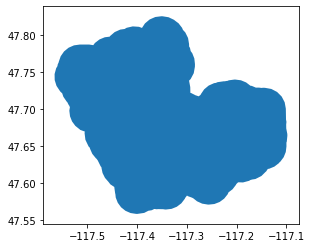

In [29]:
# Plot the subscription geometry
subscription_1.plot()

The above gives us the shape and location of the subscription geometry, but doesn't provide much context...

#### Interactive Visualizations with iPyLeaflet

Let's use **[ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/#)** to create an interactive web map with the subscription geometry so we can see a bit more context around the geometry. 

Leaflet is one of the most popular open-source JavaScript libraries for interactive maps. It’s widely used by GIS applications like OpenStreetMap, Mapbox, and CartoDB.

The ipyleaflet Python package makes it easy to integrate and control Leaflet maps in Python. It is released as part of the [PyViz](http://pyviz.org/) suite.


In [30]:
# Let's look at our multipolygon centroid in (Lat, Long)
print(subscription_1['geometry'].centroid)

# We need to input the center of our map in reverse order (Long, Lat) 
# because we are working with a geodataframe (Shapely object)
# Make sure the coordinates below match the ones printed using the line above, in reverse order.
m = Map(center=(-10.21351, -48.39203), zoom = 7, basemap= basemaps.Esri.WorldTopoMap)

geo_data = GeoData(geo_dataframe = subscription_1, columns=['geometry'], name = 'MultiPolygon')

m.add_layer(geo_data)
m.add_control(LayersControl())

m

/var/folders/63/h4dd6v153_j6nw6rznsbq5q40000gp/T/ipykernel_39856/1689031255.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(subscription_1['geometry'].centroid)


0    POINT (-117.33870 47.68662)
dtype: geometry


Map(center=[-10.21351, -48.39203], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

**Voila!** We've got an interactive web map that let's us zoom and pan around our geometry, with an `xyz` web map tile layer as a basemap. 

Of course, we could have created a similar visualization with other python/jupyter mapping libraries like [Cartopy](https://scitools.org.uk/cartopy/docs/latest/), [Folium](https://python-visualization.github.io/folium/), [GeoViews](https://geoviews.org/), or [mapboxgl-jupyter](https://github.com/mapbox/mapboxgl-jupyter). But so far we've only just scratched the surface of using these tools to explore our data. We'll see some more of the power the PyViz suite further along in our tutorials. 

### Exporting a Subscription

The last thing we'll do in this tutorial is to save our Subscription along with it's `geometry` as an [ESRI Shapefile](https://en.wikipedia.org/wiki/Shapefile) that we can open in our GIS software of choice. You can read more about the various I/O capabilities built into GeoPandas [here](http://geopandas.org/io.html#writing-spatial-data).

## Conclusion

In the next tutorial, we'll explore Planet Analytics API **Results** and dive deeper into how we can use Planet's Analytic data to unlock impactful insights!